In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
sns.set_theme(style='darkgrid', palette='colorblind')
plt.rcParams['figure.figsize'] = (22, 10)
plt.rcParams['font.size'] = 70

Text(0, 0.5, 'pTDP43')

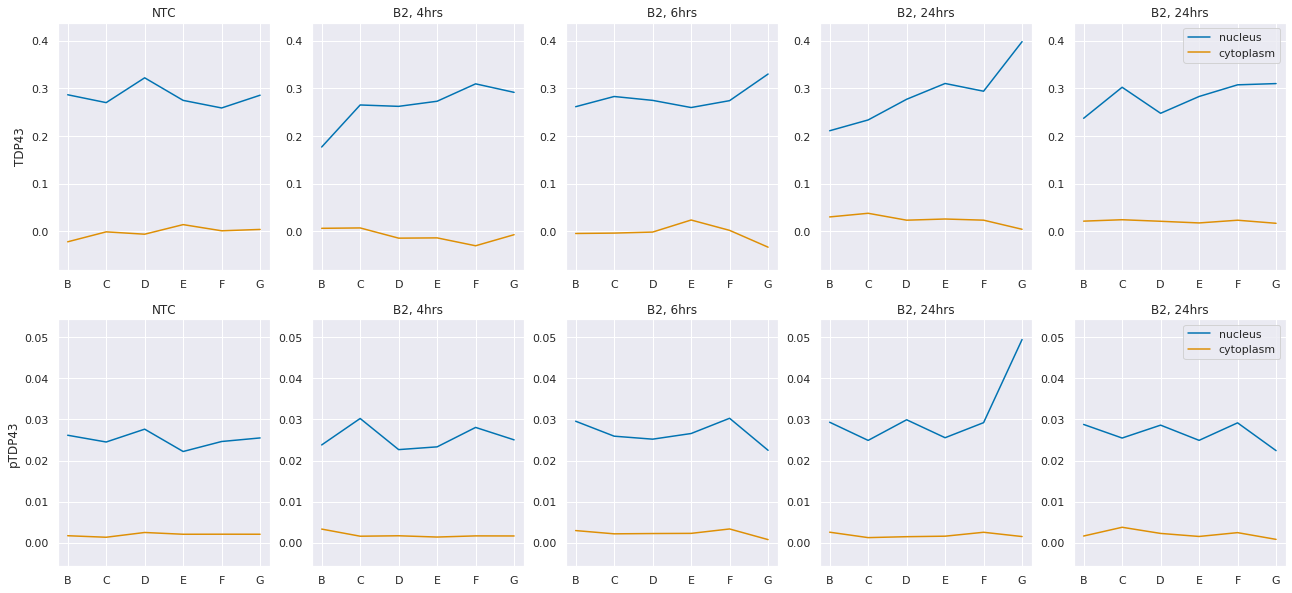

In [77]:
data_dir = pathlib.Path('/lab/processed-data/EXP_JSM002_NGN2_DIV25_wholeplate')
data = pd.read_csv(data_dir / '2022-12-12_tdp43_analysis'/'2022-12-12_tdp43_analysisImage.csv')

rows = ['B', 'C', 'D', 'E', 'F', 'G']
# cols = ['NTC', 'MG132, 4hrs', 'MG132, 6hrs', 'MG132, 24hrs', 'MG132, 24hrs']
cols = ['NTC', 'B2, 4hrs', 'B2, 6hrs', 'B2, 24hrs', 'B2, 24hrs']
measurement = 'Intensity_MeanIntensity_'
channels = ['TDP43_corrected', 'pTDP43_corrected']

fig, ax = plt.subplots(len(channels), len(cols))

for i_ch, ch in enumerate(channels):
    nuclei = data['Median_nuclei_' 
                                + measurement + channels[i_ch]]
    soma = data['Median_cytoplasm_outlines_' 
                                + measurement + channels[i_ch]]
    soma = soma - nuclei

    y_min = np.min([nuclei.min(), soma.min()])
    y_max = np.max([nuclei.max(), soma.max()])

    for i_col, col in enumerate(cols):
        wells = np.arange(i_col+5,60,10)

        ax[i_ch,i_col].plot(nuclei.iloc[wells,])
        ax[i_ch,i_col].plot(soma.iloc[wells,])
        # ax[0,i_col].xticklabels('2')
        ax[i_ch,i_col].set_ylim([y_min-(y_max*0.1), y_max+(y_max*0.1)])
        ax[i_ch,i_col].set_title(col)
        ax[i_ch,i_col].set_xticks(wells)
        ax[i_ch,i_col].set_xticklabels(rows)

    ax[i_ch,i_col].legend({'nucleus', 'cytoplasm'})
ax[0,0].set_ylabel('TDP43')
ax[1,0].set_ylabel('pTDP43')
    

In [58]:
ch[:-10]

'pTDP43'

In [36]:
y_max

0.0509537114614388

In [70]:
wells

array([12, 22, 32, 42, 52])

In [78]:
data.iloc[wells,]['FileName_DAPI']

9     20221128_JSM002_DIV25001_B11_405.tif
19    20221128_JSM002_DIV25001_C11_405.tif
29    20221128_JSM002_DIV25001_D11_405.tif
39    20221128_JSM002_DIV25001_E11_405.tif
49    20221128_JSM002_DIV25001_F11_405.tif
59    20221128_JSM002_DIV25001_G11_405.tif
Name: FileName_DAPI, dtype: object